# Handcrafted Features

## Imports

In [ ]:

########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

#!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from keras import backend as K
from sklearn.utils import shuffle

from matplotlib.pyplot import figure


########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Upload Data 

---------------------------------



Train

In [ ]:
from google.colab import files
uploaded_signal_train = files.upload()

Saving 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP


Test

In [ ]:
from google.colab import files
uploaded_signal_test = files.upload()

Saving 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP


### Reading in segments & labels

Train

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train = [key for key in uploaded_signal_train.keys()]


# set up list to hold all loaded npy 
all_dataframe_train = [] 


for i in range(len(list_of_dataframes_train)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train[i])


    # append the data to 'all' list
    all_dataframe_train.append(dataframe_train) 


all_df_train = pd.concat(all_dataframe_train)

Test

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_test = [key for key in uploaded_signal_test.keys()]


# set up list to hold all loaded npy 
all_dataframe_test = [] 


for i in range(len(list_of_dataframes_test)):

    # load in the data 
    dataframe_test = pd.read_csv(list_of_dataframes_test[i])


    # append the data to 'all' list
    all_dataframe_test.append(dataframe_test) 


all_df_test = pd.concat(all_dataframe_test)


# Quick Shuffle 

In [ ]:
all_df_train = shuffle(all_df_train)
all_df_test = shuffle(all_df_test)

# Quick Look 

In [ ]:
all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.345651,0.243621,-0.378761,-7.702587,-36.274094,6.544647,-0.001866,-0.004209,0.010049,[ 4.44089210e-16+0.j -1.36743098e-01-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,10.0,10.0,10.0,0.226947,0.270919,0.270919,1.014269,1.463456,1.463456,1.014269,1.463456,1.463456,1.085933,0.136027,0.136027,0,0,0,0.032882,0.042589,0.044694,0.221493,0.374326,0.246606,0.001253,0.000584,0.000988,...,6.783730,-0.000156,-0.003209,0.011021,-0.393286,0.181635,-0.442786,-8.061852,-36.759109,6.201022,-0.003715,-0.005141,0.007720,0.968032,50.521328,0.016125,0.327178,1418.222109,0.000125,0.062303,0.065942,0.081665,0.338572,0.585278,0.494285,0.001920,0.000705,0.001263,0.493614,-0.501615,0.316065,-0.743477,-0.409541,0.266258,0.241051,0.162547,0.253310,Go,28,2
1,1,-0.319342,0.162098,-0.342011,-7.738424,-36.147514,6.689313,-0.001100,-0.004092,0.008219,[-2.22044605e-16+0.j 8.10724443e-02+0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,10.0,10.0,10.0,0.349178,0.331988,0.331988,1.409548,1.535443,1.535443,1.409548,1.535443,1.535443,1.111614,1.028266,1.028266,0,0,0,0.050333,0.048506,0.066542,0.257834,0.426416,0.117972,0.000964,0.000973,0.002203,...,6.783730,-0.000156,-0.002876,0.011021,-0.393286,0.091814,-0.442786,-8.061852,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.823451,50.575251,0.013411,0.254541,1411.535084,0.000092,0.090104,0.085942,0.099641,0.480858,0.823928,0.138442,0.000823,0.000870,0.003775,-0.686037,0.400664,-0.931307,-0.672780,0.220964,-0.295968,0.735916,0.368056,0.203087,Go,28,2
2,2,-0.271131,0.152904,-0.319191,-7.378853,-36.185124,6.572727,-0.000447,-0.003125,0.005925,[ 2.77555756e-17+0.j -1.63596684e-01-0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,10.0,10.0,10.0,0.166835,0.279101,0.279101,1.472690,0.708644,0.708644,1.472690,0.708644,0.708644,0.071999,1.012308,1.012308,0,0,0,0.027377,0.040053,0.049630,0.591822,0.368272,0.125559,0.001518,0.001659,0.000804,...,6.757243,0.001655,-0.000278,0.007255,-0.328298,0.091814,-0.400806,-7.994001,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.743226,50.136704,0.010305,0.203591,1407.513063,0.000051,0.038717,0.067301,0.069507,1.036439,0.670277,0.184128,0.001735,0.001489,0.001226,0.226927,-0.656599,-0.653995,-0.625427,0.540082,-0.179181,0.780441,-0.404743,-0.199011,Go,28,2
3,3,-0.249181,0.161472,-0.330511,-6.654501,-36.508391,6.678391,0.000861,-0.001989,0.005660,[-2.22044605e-16+0.j 6.36372285e-02+0...,[-9.71445147e-17

In [ ]:
all_df_test.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.682452,-1.537566,1.163282,-31.175807,15.108035,6.015167,0.937977,-0.072320,-0.046816,[-2.22044605e-16+0.j 1.53001337e-01+0...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,20.0,10.0,10.0,0.643152,2.448863,2.448863,4.655601,14.411731,14.411731,4.655601,14.411731,14.411731,-0.661059,0.386908,0.386908,0,0,0,0.109038,0.380652,0.214096,0.662956,1.406793,0.416355,0.222151,0.088708,0.011931,...,6.772522,1.446242,-0.019637,-0.021178,-0.830064,-1.931298,0.771279,-32.231030,12.583961,5.367462,0.653755,-0.305338,-0.062037,3.383299,52.299009,1.057113,4.385696,1238.957808,0.944586,0.140295,0.525360,0.224491,0.294349,0.401318,0.453442,0.187720,0.022940,0.015471,0.666391,-0.695607,-0.953410,0.983856,0.946480,0.928574,-0.878817,0.824730,-0.600255,Go,28,7
1,1,-0.570402,-1.360722,1.709553,-32.287807,12.585200,5.150206,1.381306,-0.296202,-0.136848,[-7.21644966e-16+0.j 1.05372356e-01+0...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,20.0,10.0,10.0,0.860700,2.244292,2.244292,9.321138,8.889377,8.889377,9.321138,8.889377,8.889377,-0.050429,0.711532,0.711532,0,0,0,0.151184,0.332196,0.796803,0.834394,2.198260,0.604916,0.315140,0.219459,0.140874,...,5.863824,1.718010,-0.023043,-0.021178,-0.829737,-1.874020,0.771279,-33.791976,7.878010,4.060401,0.901326,-0.633810,-0.448732,3.640678,50.023212,1.814355,5.867602,1233.308799,2.181790,0.219628,0.541532,1.328693,1.394364,3.066943,1.099722,0.590682,0.332308,0.122365,-0.061180,0.647081,-0.624960,0.984721,0.980586,0.951740,-0.906847,-0.608250,0.856768,Go,28,7
2,2,-0.432210,-1.553906,2.907824,-33.842049,8.614268,4.289888,1.360710,-0.788843,-0.515477,[ 8.60422844e-16+0.j -1.86008136e-01+0...,[0. +0.j 0.75013999-0.48745819j...,[0. +0.j 0.75013999-0.48745819j...,20.0,10.0,10.0,0.906017,0.894609,0.894609,9.525538,14.787252,14.787252,9.525538,14.787252,14.787252,0.162686,-0.369606,-0.369606,0,0,0,0.155728,0.212389,0.734981,1.065952,2.695428,0.457061,0.372331,0.351509,0.310274,...,5.337253,1.718010,-0.360445,-0.074735,-0.730284,-1.799700,1.278333,-35.322797,5.257983,3.845828,0.585038,-1.394647,-0.914100,4.893939,46.746205,2.665030,11.666423,1246.503540,3.097979,0.159782,0.112439,0.853469,1.991838,5.399224,0.637311,0.488967,0.584246,0.595479,-0.895770,0.851415,-0.958038,0.974470,0.860691,0.909989,0.948261,0.878602,0.979366,Go,28,7
3,3,-0.352377,-1.637925,3.038907,-35.772118,4.248740,4.181738,0.713154,-1.206948,-0.564155,[ 3.88578059e-16+0.j -2.15915596e-01-0...,[-1.33226763e-15+0.j

# Train Test Split 

In [ ]:
# Getting X_train & y_train'
X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'	], axis = 1)
#X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run'	], axis = 1)

y_train = all_df_train['Label_segment'].values


# convert to dummy category
y_train_dum = pd.get_dummies(y_train)

print(f'\nDummy labels Shape {y_train_dum.shape}')


Dummy labels Shape (1215, 6)


In [ ]:
# Getting X_train & y_train

X_test = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
#X_test = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run'	], axis = 1)

y_test = all_df_test['Label_segment'].values

# convert to dummy category
y_test_dum = pd.get_dummies(y_test)

print(f'\nDummy labels Shape {y_test_dum.shape}')


Dummy labels Shape (515, 6)


--------------------------------------

Standard Scale 

In [ ]:
# Set up ss for non-shuffled data
ss = StandardScaler()

# fit for non-shuffled
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)


---------------------------

Deep 

In [ ]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from matplotlib import pyplot

from keras.optimizers import Adam

import time
import tensorflow as tf

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_dum.shape[1]

# set up model
model = Sequential()

#input layer
model.add(Dense(100, activation='relu' , input_shape = (X_train_scale.shape[1], )))

# hidden layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))


# output layer
model.add(Dense(n_outputs, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
X_train_scale.shape

(1215, 87)

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history = model.fit(X_train_scale, y_train_dum,
                    validation_data=(X_test_scale, y_test_dum),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100


ValueError: ignored

Learning Curves

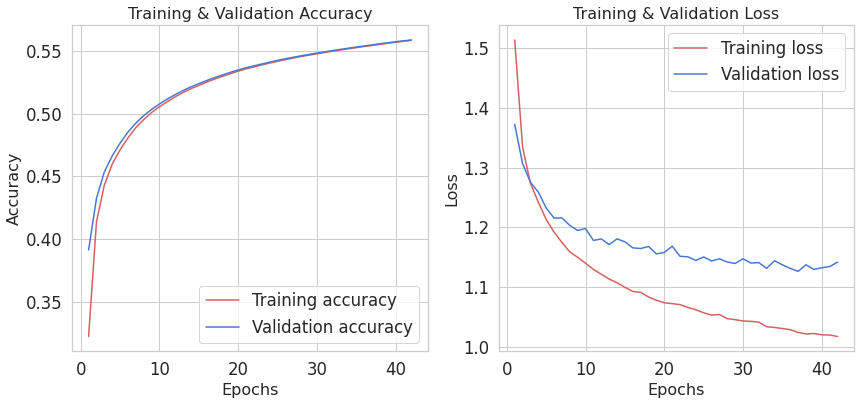

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum), axis=1)

##################


y_preds_train = model.predict(X_train_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_dum), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score , precision_score
from sklearn.metrics import balanced_accuracy_score, recall_score
from sklearn.metrics import f1_score


print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))
print("Test Precision Score : \t\t" , precision_score(max_test, max_predictions , average='weighted'))
print("Test Recall Score : \t\t" , recall_score(max_test, max_predictions , average='weighted'))

Test Balanced Accuracy : 	 0.5672549869889186
Test F1 Score : 		 0.49750540400035537
Test Precision Score : 		 0.677610316901393
Test Recall Score : 		 0.5339506172839507


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.7384219554030875
Train Balanced Accuracy : 	 0.7427782626754333
Train F1 Score : 		 0.7354001279790706


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Go', 'Turn1',  'Turn2' , 'Walk1', 'Walk2', 'Sit']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

          Go       0.77      0.44      0.56      2214
       Turn1       0.56      0.73      0.63     10801
       Turn2       0.63      0.62      0.63     10754
       Walk1       0.40      0.31      0.35      4790
       Walk2       0.47      0.40      0.43      6471
         Sit       0.49      0.46      0.47      3657

    accuracy                           0.55     38687
   macro avg       0.55      0.49      0.51     38687
weighted avg       0.55      0.55      0.54     38687



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

          Go       0.83      0.53      0.65      4641
       Turn1       0.64      0.82      0.72     24354
       Turn2       0.68      0.72      0.70     21995
       Walk1       0.58      0.44      0.50     10321
       Walk2       0.57      0.52      0.54     13607
         Sit       0.71      0.50      0.59      8955

    accuracy                           0.65     83873
   macro avg       0.67      0.59      0.62     83873
weighted avg       0.65      0.65      0.64     83873



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

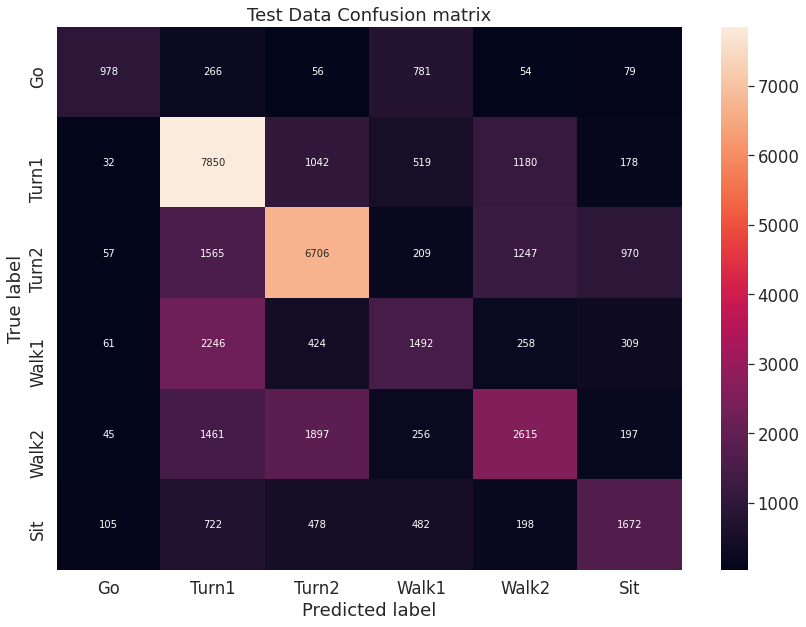

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

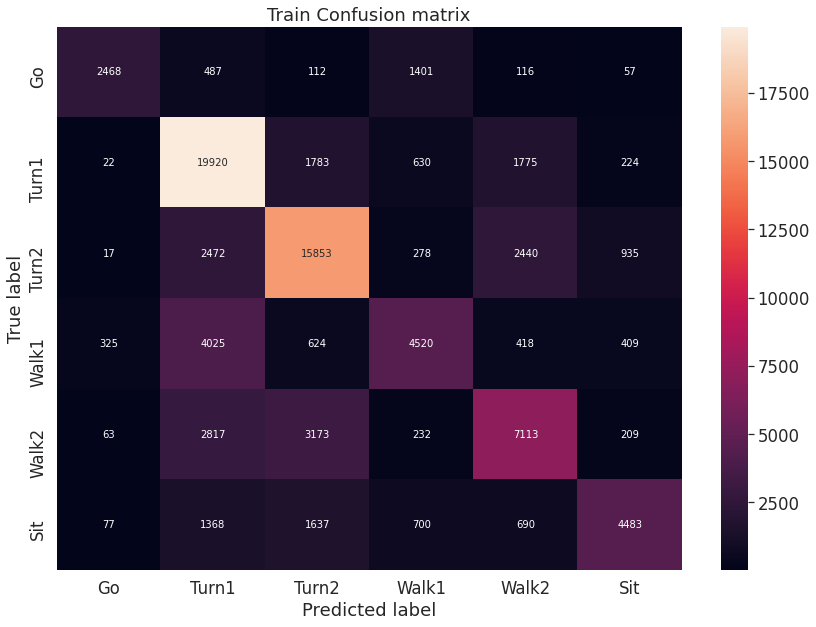

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

<br>

---------------------------------------

Check if SMOTE helps

In [ ]:
print(Counter(y_train))

Counter({'Turn 1': 24354, 'Turn 2': 21995, 'Walk 2': 13607, 'Walk 1': 10321, 'sit': 8955, 'Go': 4641})


In [ ]:

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train_scale, y_train)

# convert to dummy category
y_train_smote_dum = pd.get_dummies(y_train_smote)

print(f'\nDummy labels Shape {y_train_smote_dum.shape}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni


Dummy labels Shape (146124, 6)


In [ ]:
print(Counter(y_train_smote))

Counter({'Turn 2': 24354, 'Walk 1': 24354, 'Walk 2': 24354, 'Turn 1': 24354, 'Go': 24354, 'sit': 24354})


-----------------------------------------------------

-------------------------------

Deep + Smote

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_dum.shape[1]

# set up model
model_smote = Sequential()

#input layer
model_smote.add(Dense(50, activation='relu'))


# hidden layers
model_smote.add(Dense(50, activation='relu'))
model_smote.add(Dropout(0.5))
model_smote.add(Dense(50, activation='relu'))
#model_smote.add(Dropout(0.5))
#model_smote.add(Dense(100, activation='relu'))


# output layer
model_smote.add(Dense(n_outputs, activation='softmax'))

# compile model
model_smote.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_smote = model_smote.fit(X_train_smote, y_train_smote_dum,
                    validation_data=(X_test_scale, y_test_dum),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

NameError: ignored

-----------------------------


Learning Curves

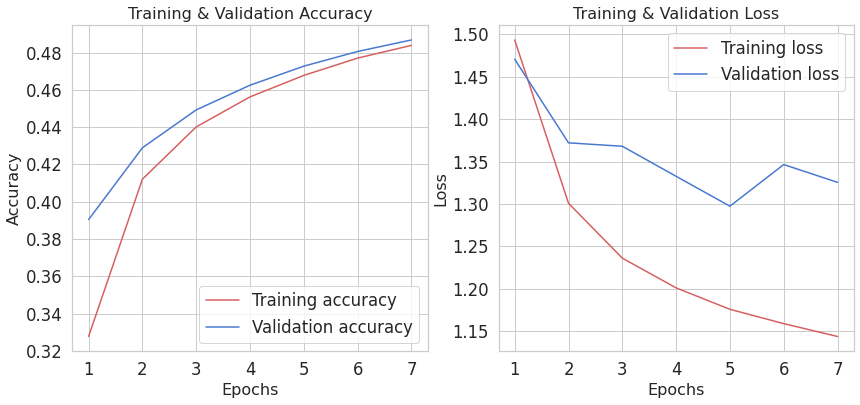

In [ ]:
history_dict = history_smote.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_smote.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum), axis=1)

##################


y_preds_train = model_smote.predict(X_train_smote)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_smote_dum), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.5549409362318092
Test Balanced Accuracy : 	 0.4825604315577497
Test F1 Score : 		 0.5399071859009389


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.5883564643727245
Train Balanced Accuracy : 	 0.5883564643727245
Train F1 Score : 		 0.5888028864785809


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LABELS = ['Go', 'Walk1', 'Turn1', 'Walk2', 'Turn2', 'Sit']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

          Go       0.51      0.51      0.51      2214
       Walk1       0.57      0.43      0.49     10801
       Turn1       0.60      0.43      0.50     10754
       Walk2       0.32      0.36      0.34      4790
       Turn2       0.38      0.51      0.43      6471
         Sit       0.32      0.57      0.41      3657

    accuracy                           0.45     38687
   macro avg       0.45      0.47      0.45     38687
weighted avg       0.49      0.45      0.46     38687



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

          Go       0.82      0.74      0.78     24354
       Walk1       0.51      0.51      0.51     24354
       Turn1       0.56      0.51      0.53     24354
       Walk2       0.52      0.47      0.49     24354
       Turn2       0.50      0.62      0.55     24354
         Sit       0.65      0.69      0.67     24354

    accuracy                           0.59    146124
   macro avg       0.59      0.59      0.59    146124
weighted avg       0.59      0.59      0.59    146124



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

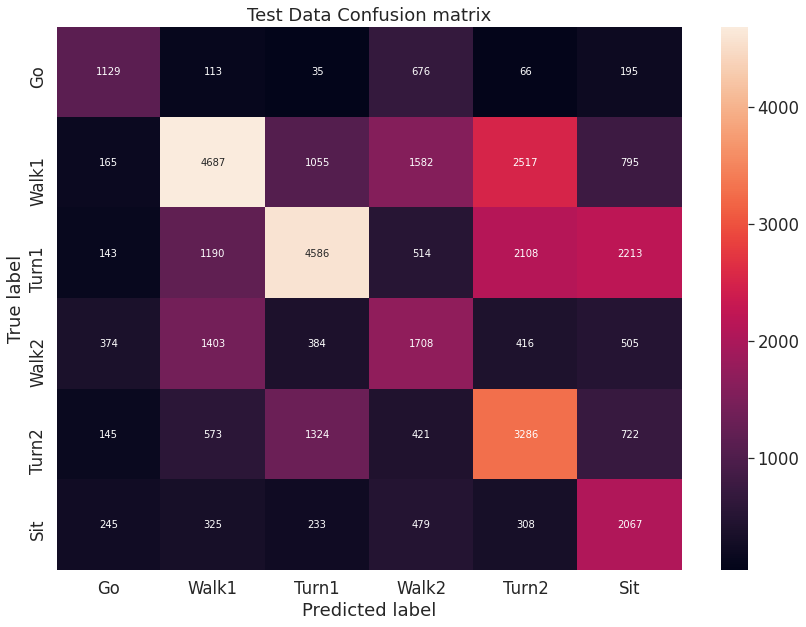

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

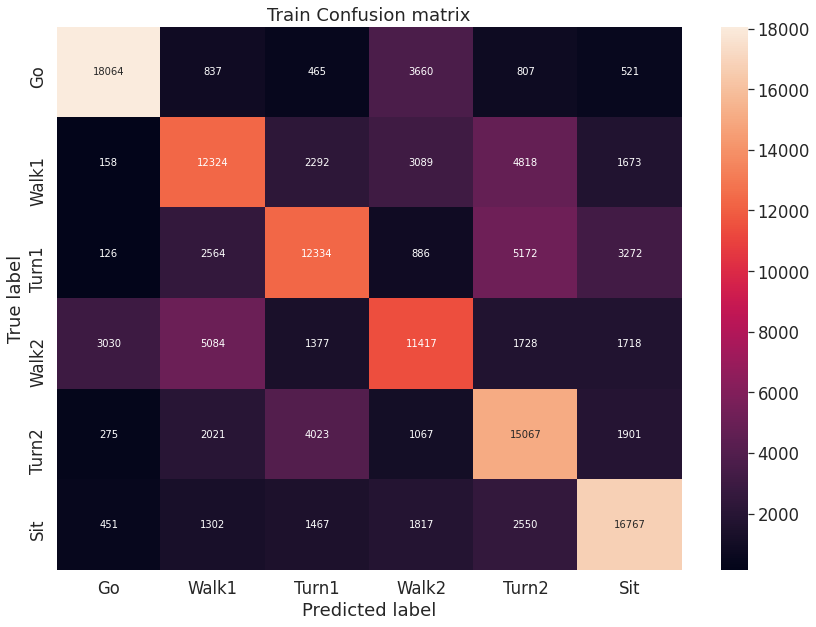

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

# Transfer Learning Touch Up

In [ ]:
from google.colab import files
uploaded_dataframe_train_id = files.upload()

Saving 83_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)
Saving 83_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)
Saving 83_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)
Saving 83_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)
Saving 83_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)


In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train_trans = [key for key in uploaded_dataframe_train_id.keys()]


# set up list to hold all loaded npy 
all_dataframe_train_trans = [] 


for i in range(len(list_of_dataframes_train_trans)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train_trans[i])


    # append the data to 'all' list
    all_dataframe_train_trans.append(dataframe_train) 


all_df_train_trans = pd.concat(all_dataframe_train_trans)

In [ ]:
from google.colab import files
uploaded_dataframe_validation_id = files.upload()

Saving 83_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)
Saving 83_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH to 83_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_OTH (1)


In [ ]:
# getting keys, which is file names of df
list_of_dataframes_val_trans = [key for key in uploaded_dataframe_validation_id.keys()]


# set up list to hold all loaded npy 
all_dataframe_val_trans = [] 


for i in range(len(list_of_dataframes_val_trans)):

    # load in the data 
    dataframe_val = pd.read_csv(list_of_dataframes_val_trans[i])


    # append the data to 'all' list
    all_dataframe_val_trans.append(dataframe_val) 


all_df_val_trans = pd.concat(all_dataframe_val_trans)

--------------------------

In [ ]:
# Getting X_train & y_train
X_train_trans = all_df_train_trans.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_train_trans = all_df_train_trans['Label_segment'].values

# convert to dummy category
y_train_trans_dum = pd.get_dummies(y_train_trans)

# scale data using fitted ss
X_train_trans_scale = ss.transform(X_train_trans)


In [ ]:
# Getting X_val & y_val
X_val_trans = all_df_val_trans.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_val_trans = all_df_val_trans['Label_segment'].values

# convert to dummy category
y_val_trans_dum = pd.get_dummies(y_val_trans)

# scale data using fitted ss
X_val_trans_scale = ss.transform(X_val_trans)


-------------------------

Now give quick train on specific case "Calibration"

In [ ]:
# Change learning rate from default adam = 0.001 , to 0.0001 and train for handful more epochs on specific participant data 
K.set_value(model.optimizer.learning_rate, 0.001)
#K.set_value(model_smote.optimizer.learning_rate, 0.001)

print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
#print("Learning rate before second fit:", model_smote.optimizer.learning_rate.numpy())

Learning rate before second fit: 0.001


Fit Specfic ID

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
new_history = model.fit(X_train_trans_scale, y_train_trans_dum,
                    validation_data=(X_val_trans_scale, y_val_trans_dum),
                    epochs = 3,
                    batch_size= 200,
                    callbacks = [earlyStopping]
                    
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/3
4/4 [==============================] - 0s 23ms/step - loss: 1.2079 - categorical_accuracy: 0.5592 - val_loss: 1.3389 - val_categorical_accuracy: 0.5591
Epoch 2/3
4/4 [==============================] - 0s 9ms/step - loss: 1.1606 - categorical_accuracy: 0.5591 - val_loss: 1.2999 - val_categorical_accuracy: 0.5591
Epoch 3/3
4/4 [==============================] - 0s 9ms/step - loss: 1.1236 - categorical_accuracy: 0.5591 - val_loss: 1.2640 - val_categorical_accuracy: 0.5591
Time Taken: 0.36166834831237793


**Smote Model**

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
new_history = model_smote.fit(X_train_trans_scale, y_train_trans_dum,
                    validation_data=(X_val_trans_scale, y_val_trans_dum),
                    epochs = 5,
                    batch_size= 200,
                    callbacks = [earlyStopping]
                    
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

---------------------------------------------

In [ ]:
def holdout_checker(smote = False):

  # Read in Fresh Data to see what predictions looks like
  from google.colab import files
  uploaded_test = files.upload()

  # getting keys, which is file names of csv
  val_file_name = [key for key in uploaded_test.keys()]

  # read in csv 
  signal_test = pd.read_csv(val_file_name[0])


  # Getting X_train & y_train
  X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run','X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ], axis = 1)
  #X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run' ], axis = 1)

  y_data = signal_test['Label_segment'].values

  # scale with already fit ss 
  X_data_scale = ss.transform(X_data)

  # convert to dummy category
  y_data_dum = pd.get_dummies(y_data)
  
  # Take max of dummy classifier
  y_data = np.argmax(np.asarray(y_data_dum), axis=1)

  # make prediction with model

  # if selecting smote trained model
  if smote == True:
    hold_preds = model_smote.predict(X_data_scale)

  # else non-smote trained model
  else:
    hold_preds = model.predict(X_data_scale)

  # take max of predictions 
  max_predictions = np.argmax(hold_preds, axis=1)

  # metrics 
  print("\n---------------------- Metrics ----------------------------------------")

  #print("Accuracy : \t\t" ,accuracy_score(y_data, max_predictions))
  print("Balanced Accuracy : \t" , balanced_accuracy_score(y_data, max_predictions))
  print("F1 Score : \t\t" , f1_score(y_data, max_predictions, average='weighted'))
  print("Precision Score : \t\t" , precision_score(y_data, max_predictions, average='weighted'))
  print("Recall Score : \t\t" , recall_score(y_data, max_predictions, average='weighted'))


  # set up labels 
  LABELS = ['Go', 'Turn1',  'Turn2' , 'Walk1', 'Walk2', 'Sit']

  # classification report 
  print("\n------------------- HoldOut Classification Report ---------------")
  print(classification_report(y_data ,max_predictions))
  print(" ")

  # confusion matrix
  confusion_matrix_out = metrics.confusion_matrix(y_data, max_predictions )

  plt.figure(figsize=(14, 10))
  sns.heatmap(confusion_matrix_out, xticklabels=LABELS, yticklabels=LABELS, annot=True ,fmt="d" )



  plt.title("HoldOut Data Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  # lastly just printing actual predictions
  print("\n0 = Go \t\t 1 = Turn 1 \t 2 = Turn 2")
  print("\n3 = Walk 1 \t 4 = Walk 2 \t 5 = Sit")

  print(" ")
  print(max_predictions)

  print("\nTest Counts" ,Counter(max_predictions))
  print("\nReal Counts" ,Counter(y_data))



Saving 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP (1)

---------------------- Metrics ----------------------------------------
Balanced Accuracy : 	 0.570937277704195
F1 Score : 		 0.4933131985412975
Precision Score : 		 0.49673437492321
Recall Score : 		 0.5473186119873817

------------------- HoldOut Classification Report ---------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.93      0.87      0.90       143
           2       0.64      0.39      0.48        98
           3       0.34      0.83      0.48       102
           4       0.47      0.80      0.59        76
           5       0.69      0.53      0.60        72

    accuracy                           0.55       634
   macro avg       0.51      0.57      0.51       634
weighted avg       0.50      0.55      0.49       634

 


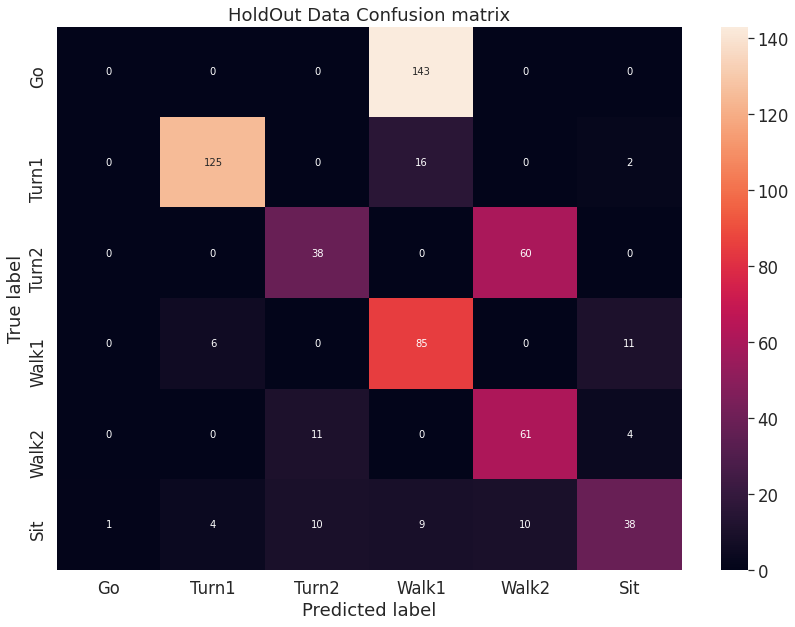


0 = Go 		 1 = Turn 1 	 2 = Turn 2

3 = Walk 1 	 4 = Walk 2 	 5 = Sit
 
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 5
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 5 3 5 3 3 3 5 3 5 5 5 5 3 3 3 1 1 1 1 3 1 5 1 1 3 3 1 1 5 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 5 1 3 3 3
 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3 1 1 3 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 2 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5
 5 5 4 4 2 2 4 4 2 4 4 4 4 4

In [ ]:
holdout_checker()

In [ ]:
holdout_checker(smote=True)

In [ ]:
holdout_checker()

In [ ]:
holdout_checker(smote=True)

<br>

<br>

--------------------

Hyper Tuning 


In [ ]:
from keras.optimizers import Adam , RMSprop, Adagrad

In [ ]:
optimisers = ['Adam' , 'RMSprop', 'Adagrad']

batch_sizes = [50,200,1000]

#learning_rate = [0.001 , 0.01, 0.1]

learning_rate = [0.00001 , 0.0001]

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_dum.shape[1]

# set up model
model = Sequential()

#input layer
model.add(Dense(100, activation='relu' , input_shape = (X_train_scale.shape[1], )))


# hidden layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(n_outputs, activation='softmax'))

model.save_weights('basemodel.h5')

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score , precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

Fit 

In [ ]:
list_of_f1           = []
list_of_recall       = []
list_of_precision    = []
list_of_balacc       = []
list_of_learningrate = []
list_of_optim        = []
list_of_batch        = []



for i in range(len(optimisers)):

  for size in batch_sizes:

    for learn in learning_rate:

      # resets the weights back to random
      model.load_weights('basemodel.h5')

      # compile model
      model.compile(loss='categorical_crossentropy', optimizer= optimisers[i] , metrics=[tf.keras.metrics.CategoricalAccuracy()])

      # set learning rate
      K.set_value(model.optimizer.learning_rate, learn)

      # just for timing model
      t0 = time.time()

      # fitting model 
      history = model.fit(X_train_scale, y_train_dum,
                          validation_data=(X_test_scale, y_test_dum),
                          epochs = 100,
                          batch_size=size,
                          callbacks=[earlyStopping, mcp_save]
                          )


      t1 = time.time()

      total = t1-t0

      print(f'Time Taken: {total}')

      # For Confusion matrix & Classification Report 

      y_preds = model.predict(X_test_scale)
      max_predictions = np.argmax(y_preds, axis=1)

      max_test = np.argmax(np.asarray(y_test_dum), axis=1)

      ##################


      y_preds_train = model.predict(X_train_scale)

      max_predictions_train = np.argmax(y_preds_train, axis=1)
      max_train = np.argmax(np.asarray(y_train_dum), axis=1)


      #############################

      list_of_f1.append(f1_score(max_test, max_predictions , average='weighted'))          
      list_of_recall.append(recall_score(max_test, max_predictions , average='weighted'))       
      list_of_precision.append(precision_score(max_test, max_predictions , average='weighted'))    
      list_of_balacc.append(balanced_accuracy_score(max_test, max_predictions))       
      list_of_learningrate.append(learn) 
      list_of_optim.append(optimisers[i])
      list_of_batch.append(size)


      print("-"*50)
      print("\n")
      #Metrics
      print(f"{optimisers[i]} - Learning Rate {learn} - Batch Size: {size}  -  Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
      print(f"{optimisers[i]} - Learning Rate {learn} - Batch Size: {size}  -  Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))
      print(f"{optimisers[i]} - Learning Rate {learn} - Batch Size: {size}  -  Test Precision Score : \t\t" , precision_score(max_test, max_predictions , average='weighted'))
      print(f"{optimisers[i]} - Learning Rate {learn} - Batch Size: {size}  -  Test Recall Score : \t\t" , recall_score(max_test, max_predictions , average='weighted'))

      print("\n")
      print("-"*50)


Epoch 1/100
1678/1678 [==============================] - 6s 3ms/step - loss: 2.0307 - categorical_accuracy: 0.1302 - val_loss: 1.7304 - val_categorical_accuracy: 0.1873
Epoch 2/100
1678/1678 [==============================] - 4s 2ms/step - loss: 1.7736 - categorical_accuracy: 0.2067 - val_loss: 1.6798 - val_categorical_accuracy: 0.2256
Epoch 3/100
1678/1678 [==============================] - 4s 2ms/step - loss: 1.7083 - categorical_accuracy: 0.2351 - val_loss: 1.6569 - val_categorical_accuracy: 0.2461
Epoch 4/100
1678/1678 [==============================] - 4s 3ms/step - loss: 1.6751 - categorical_accuracy: 0.2513 - val_loss: 1.6395 - val_categorical_accuracy: 0.2582
Epoch 5/100
1678/1678 [==============================] - 4s 2ms/step - loss: 1.6553 - categorical_accuracy: 0.2618 - val_loss: 1.6238 - val_categorical_accuracy: 0.2673
Epoch 6/100
1678/1678 [==============================] - 4s 3ms/step - loss: 1.6350 - categorical_accuracy: 0.2701 - val_loss: 1.6085 - val_categorical_acc

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f15d491dd40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Time Taken: 202.850017786026
--------------------------------------------------


Adam - Learning Rate 1e-05 - Batch Size: 200  -  Test Balanced Accuracy : 	 0.3775779418444043
Adam - Learning Rate 1e-05 - Batch Size: 200  -  Test F1 Score : 		 0.42724955645137774
Adam - Learning Rate 1e-05 - Batch Size: 200  -  Test Precision Score : 		 0.44926762633317463
Adam - Learning Rate 1e-05 - Batch Size: 200  -  Test Recall Score : 		 0.4451883061493525


--------------------------------------------------
Epoch 1/100
420/420 [==============================] - 3s 5ms/step - loss: 1.8966 - categorical_accuracy: 0.1630 - val_loss: 1.6394 - val_categorical_accuracy: 0.2522
Epoch 2/100
420/420 [==============================] - 2s 4ms/step - loss: 1.6469 - categorical_accuracy: 0.2685 - val_loss: 1.5740 - val_categorical_accuracy: 0.2885
Epoch 3/100
420/420 [==============================] - 2s 4ms/step - loss: 1.5793 - categorical_accuracy: 0.2966 - val_loss: 1.5155 - val_categorical_accuracy: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------


Adagrad - Learning Rate 0.0001 - Batch Size: 50  -  Test Balanced Accuracy : 	 0.19059939845185145
Adagrad - Learning Rate 0.0001 - Batch Size: 50  -  Test F1 Score : 		 0.21853193542836283
Adagrad - Learning Rate 0.0001 - Batch Size: 50  -  Test Precision Score : 		 0.3324737910968165
Adagrad - Learning Rate 0.0001 - Batch Size: 50  -  Test Recall Score : 		 0.3059684131620441


--------------------------------------------------
Epoch 1/100
420/420 [==============================] - 2s 4ms/step - loss: 2.1839 - categorical_accuracy: 0.1156 - val_loss: 2.0016 - val_categorical_accuracy: 0.1218
Epoch 2/100
420/420 [==============================] - 1s 3ms/step - loss: 2.1684 - categorical_accuracy: 0.1205 - val_loss: 1.9938 - val_categorical_accuracy: 0.1217
Epoch 3/100
420/420 [==============================] - 1s 3ms/step - loss: 2.1632 - categorical_accuracy: 0.1214 - val_loss: 1.9876 - val_categorical_accuracy: 0.1222
Epoch 4/100


In [ ]:
new_df = pd.DataFrame()

new_df['Optimizer'] = list_of_optim
new_df['BatchSize'] = list_of_batch
new_df['LearningRate'] = list_of_learningrate
new_df['F1-Score'] = list_of_f1
new_df['Balanced Accuracy'] = list_of_balacc
new_df['Recall Score'] = list_of_recall
new_df['Precision Score'] = list_of_precision



In [ ]:
new_df[ (new_df['LearningRate'] == 0.001)  | (new_df['LearningRate'] == 0.01)   ]

,Optimizer,BatchSize,LearningRate,F1-Score,Balanced Accuracy,Recall Score,Precision Score
0,Adam,50,0.001,0.533079,0.473535,0.546747,0.542284
1,Adam,50,0.010,0.439668,0.401801,0.464962,0.509436
3,Adam,200,0.001,0.534694,0.484656,0.544085,0.541973
4,Adam,200,0.010,0.479777,0.434223,0.504743,0.530464
6,Adam,1000,0.001,0.528214,0.480617,0.544110,0.541218
7,Adam,1000,0.010,0.514267,0.450646,0.531367,0.536709
9,RMSprop,50,0.001,0.526619,0.478597,0.538656,0.536360
10,RMSprop,50,0.010,0.399334,0.368274,0.438313,0.467550
12,RMSprop,200,0.001,0.526999,0.479967,0.529868,0.527963
13,RMSprop,200,0.010,0.497896,0.456143,0.515108,0.517273
